45 21564
90 29288


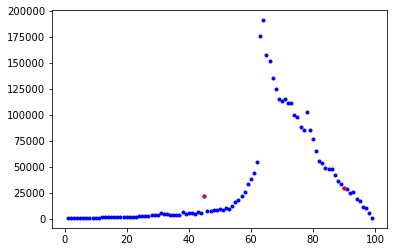

In [1]:
# if contacts > something : new phase
# if contacts < something : new phase 
import numpy as np
import matplotlib.pyplot as plt

path_res = ["../../experiment7/statistics/ExpStats/"]#["../../experiment8/statistics/ExpStats/", "../../experiment9/statistics/ExpStats/"]

for path in path_res:
    con = np.load(path + "len_graphs.npy")
    save_path = path.split("Exp")[0] + "Centrality/slice_phases.npy"

    num_s  = len(con)
    cond1= 0.2*(1e5)
    cond2= 0.3*(1e5)

    slice_p = np.zeros(2)
    done = False
    for i in range(num_s):
        if done:
            break
        c = con[i]
        if c > cond1:
            slice_p[0] = i
            for j in range(i+1,num_s):
                c = con[j]
                if c < cond2 and j > num_s//1.5:
                    slice_p[1] = j
                    done = True
                    break

    np.save(save_path, slice_p)



    sll = [i for i in range(1,num_s+1)]
    plt.plot(sll,con, "b.")
    for si in slice_p:
        plt.plot(sll[int(si)], con[int(si)], "r.")
        print(sll[int(si)], con[int(si)])

    plt.show()



    


